# Introduction to Image Processing

This numerical tour explores some basic image processing tasks.

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [12]:
library(imager)
library(png)
library(pracma)

# Importing the libraries
for (f in list.files(path="nt_toolbox/toolbox_general/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_general/", f, sep=""))
}
for (f in list.files(path="nt_toolbox/toolbox_signal/", pattern="*.R")) {
    source(paste("nt_toolbox/toolbox_signal/", f, sep=""))
}

## Image Loading and Displaying

Several functions are implemented to load and display images.


First we load an image.

path to the images

In [2]:
name = 'nt_toolbox/data/lena.png'
n = 256
M = load_image(name, n)

We can display it. It is possible to zoom on it, extract pixels, etc.

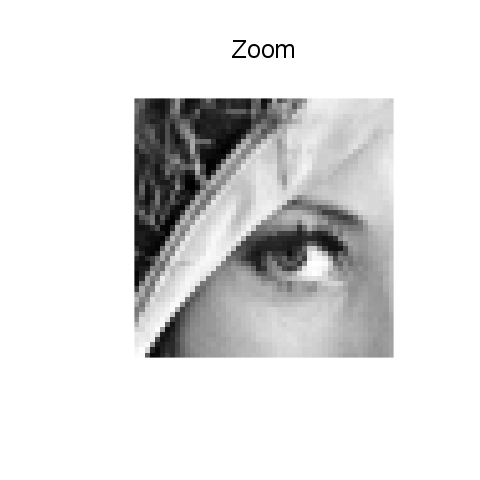

In [3]:
options(repr.plot.width=4, repr.plot.height=4)
imageplot(M[c(((n/2) - 25):((n/2) + 25)), c(((n/2) - 25):((n/2) + 25))], 'Zoom', c(1, 2, 2))

## Image Modification

An image is a 2D array, that can be modified as a matrix.

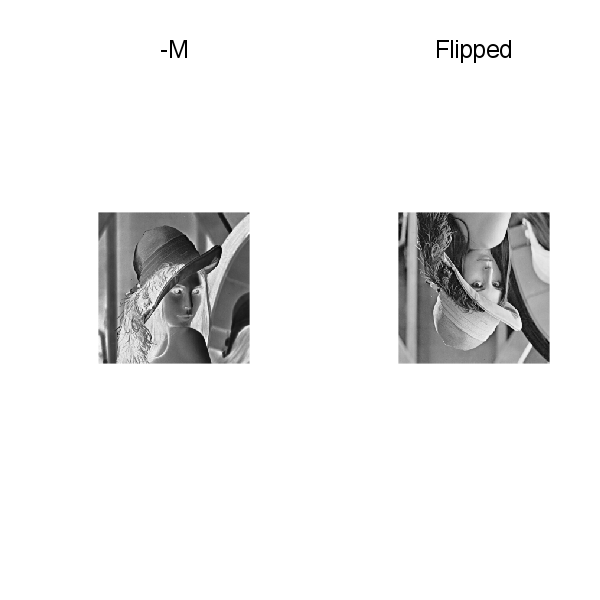

In [4]:
options(repr.plot.width=5, repr.plot.height=5)
imageplot(-M, '-M', c(1,2,1))
imageplot(M[nrow(M):1,], 'Flipped', c(1,2,2))

Blurring is achieved by computing a convolution with a kernel. 

Compute the low pass Gaussian kernel. Warning, the indexes needs to be modulo $n$ in order to use FFTs.

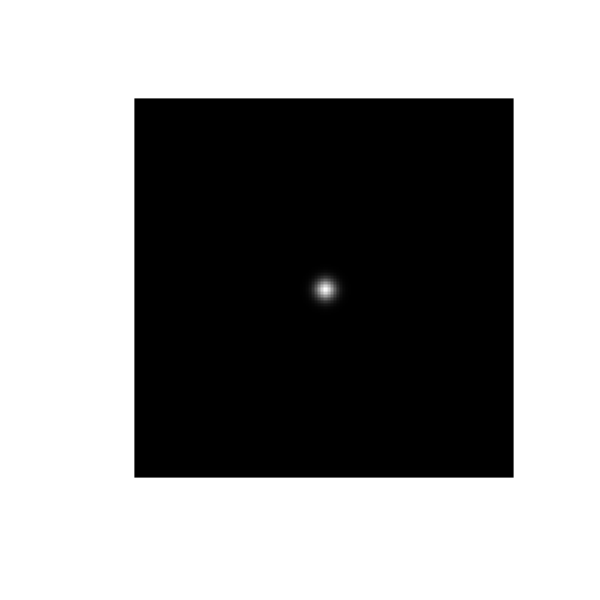

In [5]:
sigma = 5.
t = c(0:((n/2)), -(n/2):-2)
mesh = meshgrid(t)
X = mesh$X
Y = mesh$Y
h = exp( -(X**2 + Y**2)/(2.0 * sigma**2) )
h = h/sum(h)
imageplot(fftshift(h))

Compute the periodic convolution ussing FFTs

In [6]:
Mh = Re(fft(fft(M[,]) * fft(h), inverse=TRUE) / n)

Display

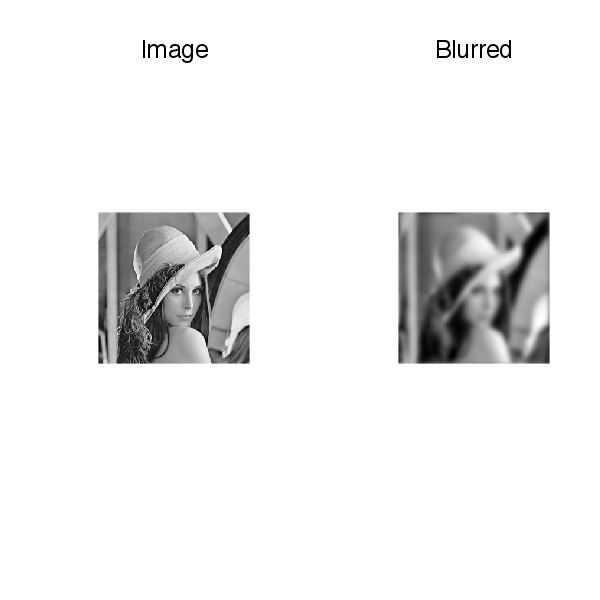

In [7]:
imageplot(M, 'Image', c(1, 2, 1))
imageplot(Mh, 'Blurred', c(1, 2, 2))

Several differential and convolution operators are implemented.

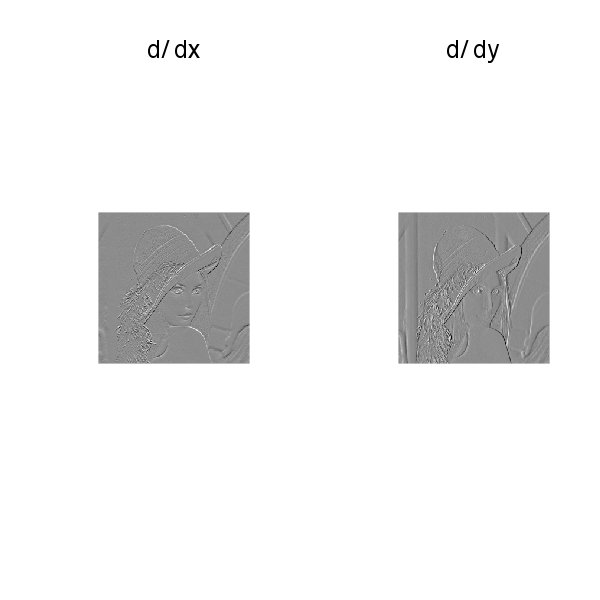

In [8]:
G = grad(M[,])
imageplot(G[,,1], 'd/ dx', c(1, 2, 1))
imageplot(G[,,2], 'd/ dy', c(1, 2, 2))

## Fourier Transform

The 2D Fourier transform can be used to perform low pass approximation
and interpolation (by zero padding).

Compute and display the Fourier transform (display over a log scale).
The function fftshift is useful to put the 0 low frequency in the
middle. After fftshift, the zero frequency is located at position
$(n/2+1,n/2+1)$.

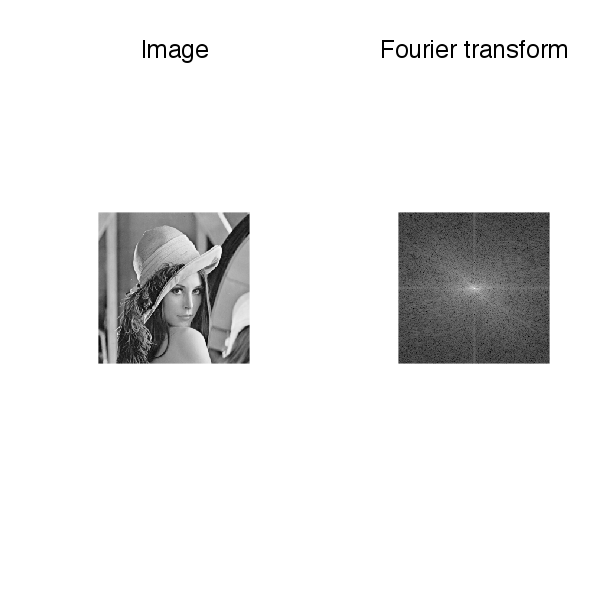

In [9]:
Mf = fft(M[,])
Lf = fftshift(log(abs(Mf) + 1e-1))
imageplot(M, 'Image', c(1, 2, 1))
imageplot(Lf, 'Fourier transform', c(1, 2, 2))

**Exercise 1:** To avoid boundary artifacts and estimate really the frequency content of
the image (and not of the artifacts!), one needs to multiply M by a
smooth windowing function h and compute fft2(M*h). Use a sine
windowing function. Can you interpret the resulting filter ?

In [10]:
# Insert code here.

**Exercise 2:** Perform low pass filtering by removing the high frequencies of the
spectrum. What do you oberve ?

In [11]:
# Insert code here.